In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
bg=gpd.read_file('/content/Data/Bungoma.shp')
bg.head()

In [ ]:
column = ['dhis2_id', 'scpcode', 'ctypcode', 'provpcode']
bg2=bg.drop(column, axis=1)
bg2.head(5)

,country,province,county,subcounty,Female,Male,Total,geometry
0,Kenya,Western,Bungoma,Bumula Sub County,112523,103368,215891,"POLYGON ((34.52783 0.50833, 34.52831 0.50798, ..."
1,Kenya,Western,Bungoma,Webuye West Sub County,78331,74180,152511,"POLYGON ((34.75511 0.66076, 34.75552 0.65889, ..."
2,Kenya,Western,Bungoma,Cheptais Sub County,68312,67717,136029,"POLYGON ((34.50292 0.83184, 34.50570 0.83107, ..."
3,Kenya,Western,Bungoma,Kabuchai Sub County,91438,86302,177740,"POLYGON ((34.62161 0.70854, 34.62171 0.70850, ..."
4,Kenya,Western,Bungoma,Kanduyi Sub County,148055,139705,287760,"POLYGON ((34.67885 0.52781, 34.67886 0.52781, ..."


In [ ]:
bg2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bg2_proj=bg2.to_crs('32637')

In [ ]:
bg2_proj.crs

<Projected CRS: EPSG:32637>
Name: WGS 84 / UTM zone 37N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, northern hemisphere between equator and 84°N, onshore and offshore. Djibouti. Egypt. Eritrea. Ethiopia. Georgia. Iraq. Jordan. Kenya. Lebanon. Russian Federation. Saudi Arabia. Somalia. Sudan. Syria. Türkiye (Turkey). Ukraine.
- bounds: (36.0, 0.0, 42.0, 84.0)
Coordinate Operation:
- name: UTM zone 37N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bg2_proj.shape

(10, 8)

In [ ]:
bg2_proj.geom_type

0         Polygon
1         Polygon
2         Polygon
3         Polygon
4         Polygon
5    MultiPolygon
6         Polygon
7         Polygon
8         Polygon
9         Polygon
dtype: object

In [ ]:
bg2_proj["area"]= bg2_proj.geometry.area/1000000
bg2_proj.head(4)

,country,province,county,subcounty,Female,Male,Total,geometry,area
0,Kenya,Western,Bungoma,Bumula Sub County,112523,103368,215891,"POLYGON ((1869.118 56358.649, 1923.241 56319.4...",347.826484
1,Kenya,Western,Bungoma,Webuye West Sub County,78331,74180,152511,"POLYGON ((27245.753 73235.937, 27291.589 73028...",239.594705
2,Kenya,Western,Bungoma,Cheptais Sub County,68312,67717,136029,"POLYGON ((-877.802 92228.816, -567.236 92143.1...",223.110714
3,Kenya,Western,Bungoma,Kabuchai Sub County,91438,86302,177740,"POLYGON ((12353.507 78546.219, 12365.117 78540...",232.308106


In [ ]:
bg2_proj['Pop/sqkm']=bg2_proj['Total']/bg2_proj['area']
bg2_proj

,country,province,county,subcounty,Female,Male,Total,geometry,area,Pop/sqkm
0,Kenya,Western,Bungoma,Bumula Sub County,112523,103368,215891,"POLYGON ((1869.118 56358.649, 1923.241 56319.4...",347.826484,620.685916
1,Kenya,Western,Bungoma,Webuye West Sub County,78331,74180,152511,"POLYGON ((27245.753 73235.937, 27291.589 73028...",239.594705,636.537440
2,Kenya,Western,Bungoma,Cheptais Sub County,68312,67717,136029,"POLYGON ((-877.802 92228.816, -567.236 92143.1...",223.110714,609.692818
3,Kenya,Western,Bungoma,Kabuchai Sub County,91438,86302,177740,"POLYGON ((12353.507 78546.219, 12365.117 78540...",232.308106,765.104598
4,Kenya,Western,Bungoma,Kanduyi Sub County,148055,139705,287760,"POLYGON ((18725.416 58506.748, 18725.853 58506...",318.528829,903.403316
5,Kenya,Western,Bungoma,Mt Elgon Sub County,39893,38977,78870,"MULTIPOLYGON (((15071.131 90770.153, 15069.865...",733.442685,107.533965
6,Kenya,Western,Bungoma,Sirisia Sub County,61649,58225,119874,"POLYGON ((-2030.003 86323.645, -2025.343 86289...",213.149940,562.392840
7,Kenya,Western,Bungoma,Webuye East Sub County,62526,58790,121316,"POLYGON ((28699.694 66995.254, 28704.758 66988...",164.671150,736.716782
8,Kenya,Western,Bungoma,Kimilili Sub County,83475,78560,162035,"POLYGON ((29108.982 82657.029, 29079.628 82639...",181.184319,894.310285
9,Kenya,Western,Bungoma,Tongaren Sub County,51657,48685,100342,"POLYGON ((42093.038 75926.153, 42090.155 75883...",378.352186,265.207930


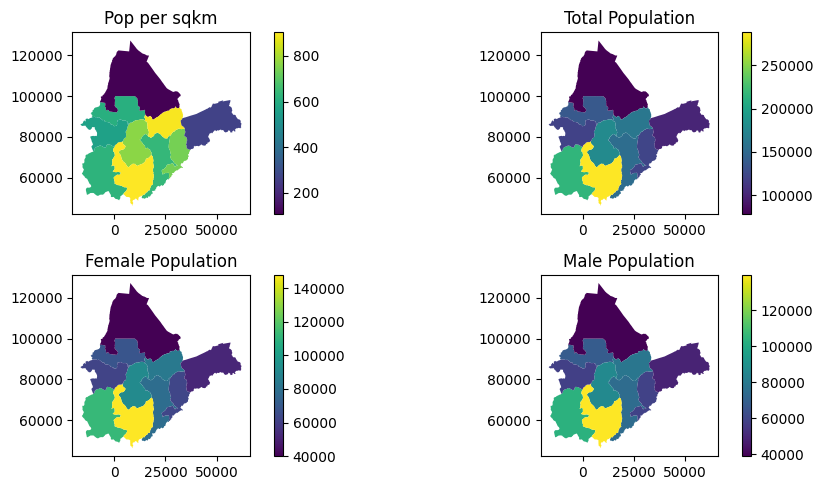

In [ ]:
fig, ((ax1,ax2),(ax3,ax4))= plt.subplots(nrows=2, ncols=2, figsize=(10,5))
bg2_proj.plot(ax=ax1, column='Pop/sqkm', cmap='viridis', legend=True)
ax1.set_title('Pop per sqkm')
bg2_proj.plot(ax=ax2, column='Total', cmap='viridis', legend=True)
ax2.set_title('Total Population')
bg2_proj.plot(ax=ax3, column='Female', cmap='viridis', legend=True)
ax3.set_title('Female Population')
bg2_proj.plot(ax=ax4, column='Male', cmap='viridis', legend=True)
ax4.set_title('Male Population')

plt.tight_layout()



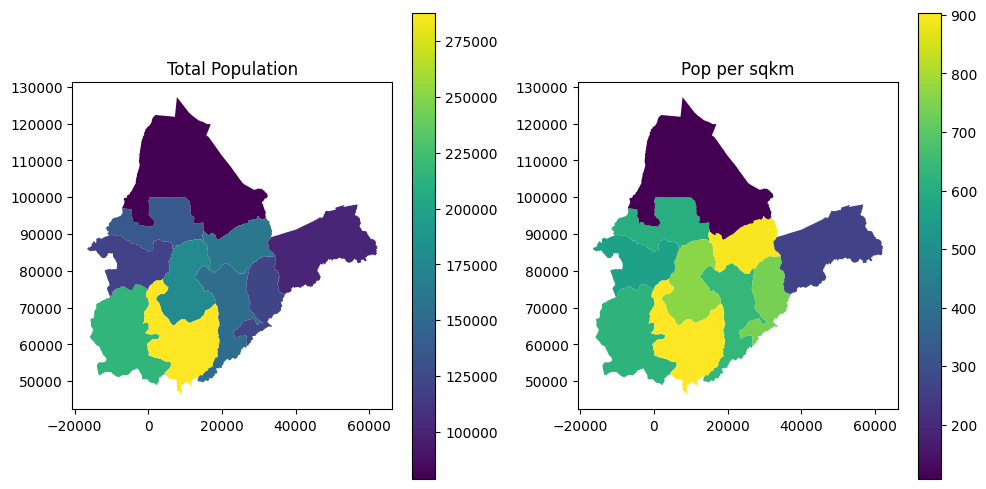

In [ ]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,5))
bg2_proj.plot(ax=ax1, column='Total', cmap='viridis', legend=True)
ax1.set_title('Total Population')
bg2_proj.plot(ax=ax2, column='Pop/sqkm', cmap='viridis', legend=True)
ax2.set_title('Pop per sqkm')

plt.tight_layout()